### Homework Sheet 2 of group number 19
Members: Jkraasch , Tpries and Phummel

In [2]:
import tensorflow as tf #check

#using googles given import method of the tutorial
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

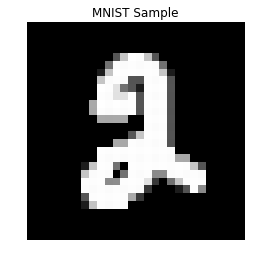

In [27]:
sample = 1 # change this number to get a different sample
plt.axis('off')
plt.title('MNIST Sample')
plt.imshow(np.reshape(mnist.train.images[sample],(28,28)), cmap='gray')

In [76]:
def training(optimizer='gradient_descent'):
    #placeholder for n images, 784 pixels
    x = tf.placeholder(tf.float32, [None, 784])

    #weightsmatrix, size so that x*w -> output[10,1]
    W = tf.Variable(tf.ones([784, 10])*tf.distributions.Normal(loc=0.0,scale=0.000002).sample([784,10]))


    #10 biases which we can add on x*w
    b = tf.Variable(tf.zeros([10]))

    #estimated by net
    y_prime = tf.nn.softmax(tf.matmul(x,W)+b)


    y_target = tf.placeholder(tf.float32, [None, 10])


    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_target, logits = y_prime))


    #Gradient Descent
    if optimizer == 'gradient_descent':
        train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    elif optimizer == 'adam':
        train_step = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cross_entropy)
    else:
        raise NotImplementedError('No other optimizers implemented.')



    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    correct_prediction = tf.equal(tf.argmax(y_target,1), tf.argmax(y_prime,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    #Run 3 epochs and show all samples once per epoch
    valid_accs = [] #validation accuracies
    valid_ces = []  # validation cross-entropies
    for epoch in range(3):
        for i in range(1000):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run(train_step, feed_dict={x: batch_xs, y_target: batch_ys})
            if i % 100 == 0:
                valid_accs.append(sess.run(accuracy, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels}))
                valid_ces.append(sess.run(cross_entropy, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels}))

    print('Accuracy on test set after three epochs of training with', optimizer, ':',
          sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels}))
    return valid_accs, valid_ces

In [70]:
valid_accs, valid_ces = training()

Accuracy on test set after three epochs of training with gradient_descent : 0.9173


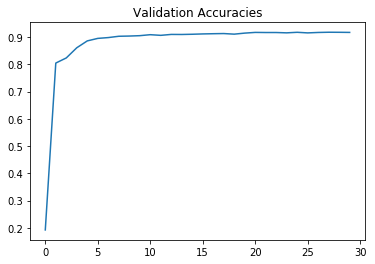

In [71]:
plt.plot(range(len(valid_accs)), valid_accs)
plt.title('Validation Accuracies')

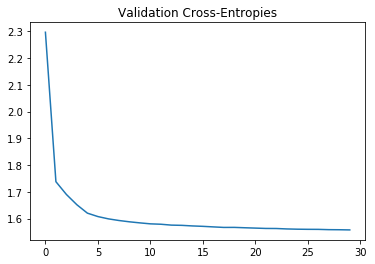

In [72]:
plt.plot(range(len(valid_ces)), valid_ces)
plt.title('Validation Cross-Entropies')

In [77]:
### Now try Adam Optimizer instead

valid_accs, valid_ces = training(optimizer='adam')

Accuracy on test set after three epochs of training with adam : 0.9289


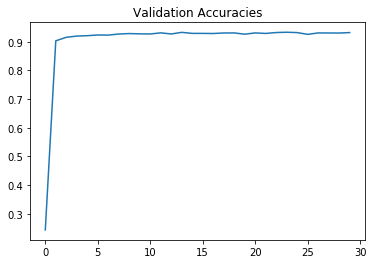

In [78]:
plt.plot(range(len(valid_accs)), valid_accs)
plt.title('Validation Accuracies')

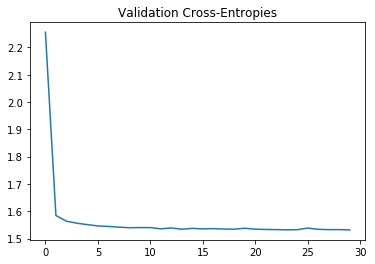

In [79]:
plt.plot(range(len(valid_ces)), valid_ces)
plt.title('Validation Cross-Entropies')

With the Adam Optimizer the end result is slightly better than with normal gradient descent, but from the plots you can see that convergence is much faster.